<h1>Decision Tree</h1>

Creation of a predictive model, to predict 'deposit' in function of 'age', 'loan', 'education' and 'job' using a bank dataset. The purpose of this, is create a decision tree, explore their hypeparameters and validate it.

In [1]:
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn import tree
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from ipynb.fs.full.funPyModeling import status

In [2]:
def plot_tree(model, x_data):
    #Create Dot Data
    dot_data = tree.export_graphviz(model, 
                                    out_file=None, 
                                    feature_names=list(x_data.columns.values), 
                                    class_names=['No', 'Si'], 
                                    rounded=True, 
                                    filled=True)

    graph = pydotplus.graph_from_dot_data(dot_data)

    # Show graph
    return Image(graph.create_png())

<h3>Data loading</h3>

In [3]:
bank_data = pd.read_csv('data/bank_2.csv', sep=';')

<h3>Dataset status</h3>

In [4]:
bank_data

age          job  marital  education default  balance housing loan  \
0       59       admin.  married  secondary      no     2343     yes   no   
1       56       admin.  married  secondary      no       45      no   no   
2       41   technician  married  secondary      no     1270     yes   no   
3       55     services  married  secondary      no     2476     yes   no   
4       54       admin.  married   tertiary      no      184      no   no   
...    ...          ...      ...        ...     ...      ...     ...  ...   
11157   33  blue-collar   single    primary      no        1     yes   no   
11158   39     services  married  secondary      no      733      no   no   
11159   32   technician   single  secondary      no       29      no   no   
11160   43   technician  married  secondary      no        0      no  yes   
11161   34   technician  married  secondary      no        0      no   no   

        contact  day month  duration  campaign  pdays  previous poutcome  \
0       unknown    5   may      1042         1     -1         0  unknown   
1       unknown    5   may      1467         1     -1         0  unknown   
2       unknown    5   may      1389         1     -1         0      NaN   
3       unknown    5   may       579         1     -1         0      NaN   
4       unknown    5   may       673         2     -1         0      NaN   
...         ...  ...   ...       ...       ...    ...       ...      ...   
11157  cellular   20   apr       257         1     -1         0  unknown   
11158   unknown   16   jun        83         4     -1         0  unknown   
11159  cellular   19   aug       156         2     -1         0  unknown   
11160  cellular    8   may         9         2    172         5  failure   
11161  cellular    9   jul       628         1     -1         0  unknown   

      deposit  
0         yes  
1         yes  
2         yes  
3         yes  
4         yes  
...       ...  
11157      no  
11158      no  
11159      no  
11160      no  
11161      no  

[11162 rows x 17 columns]

In [5]:
status(bank_data)

variable  q_nan     p_nan  q_zeros   p_zeros  unique    type
0         age      0  0.000000        0  0.000000      79   int64
1         job      0  0.000000        0  0.000000      12  object
2     marital      0  0.000000        0  0.000000       5  object
3   education      0  0.000000        0  0.000000       4  object
4     default      0  0.000000        0  0.000000       2  object
5     balance      0  0.000000      774  0.069342    3805   int64
6     housing      0  0.000000        0  0.000000       2  object
7        loan      0  0.000000        0  0.000000       2  object
8     contact      7  0.000627        0  0.000000       3  object
9         day      0  0.000000        0  0.000000      31   int64
10      month      0  0.000000        0  0.000000      12  object
11   duration      0  0.000000        0  0.000000    1428   int64
12   campaign      0  0.000000        0  0.000000      36   int64
13      pdays      0  0.000000        0  0.000000     472   int64
14   previous      0  0.000000     8324  0.745744      34   int64
15   poutcome     67  0.006003        0  0.000000       4  object
16    deposit      5  0.000448        0  0.000000       2  object

There are 5 NaNs in 'deposit' (categorical variable) that i have to take in account. Also, 'loan' and 'education' are categorical variables (they have to be numerical in order to train a decision tree).

In [6]:
ProfileReport(bank_data)

<h3>Data Preparation</h3>

Target and features variables separation.

In [7]:
x_data = bank_data[['age', 'loan', 'education', 'job']]
y_data = bank_data['deposit']

In [8]:
status(x_data)

variable  q_nan  p_nan  q_zeros  p_zeros  unique    type
0        age      0    0.0        0      0.0      79   int64
1       loan      0    0.0        0      0.0       2  object
2  education      0    0.0        0      0.0       4  object
3        job      0    0.0        0      0.0      12  object

In [9]:
status(y_data)

variable  q_nan     p_nan  q_zeros  p_zeros  unique    type
0  deposit      5  0.000448        0      0.0       2  object

There are 5 NaNs in 'deposit'

In [10]:
y_data = y_data.fillna(value = 'null')

Training set and test set separation.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

Categorical variables to numericals convertion.

In [14]:
x_data_training_2 = pd.get_dummies(x_train, drop_first = True)
y_data_training_2 = pd.get_dummies(y_train, drop_first = True).drop('null', axis = 1)
x_data_test_2 = pd.get_dummies(x_test, drop_first = True)
y_data_test_2 = pd.get_dummies(y_test, drop_first = True).drop('null', axis = 1)

<h3>Model Creation</h3>

Decision tree creation with max_depth = 3

In [15]:
model = tree.DecisionTreeClassifier(max_depth=3) 
model.fit(x_data_training_2, y_data_training_2)

DecisionTreeClassifier(max_depth=3)

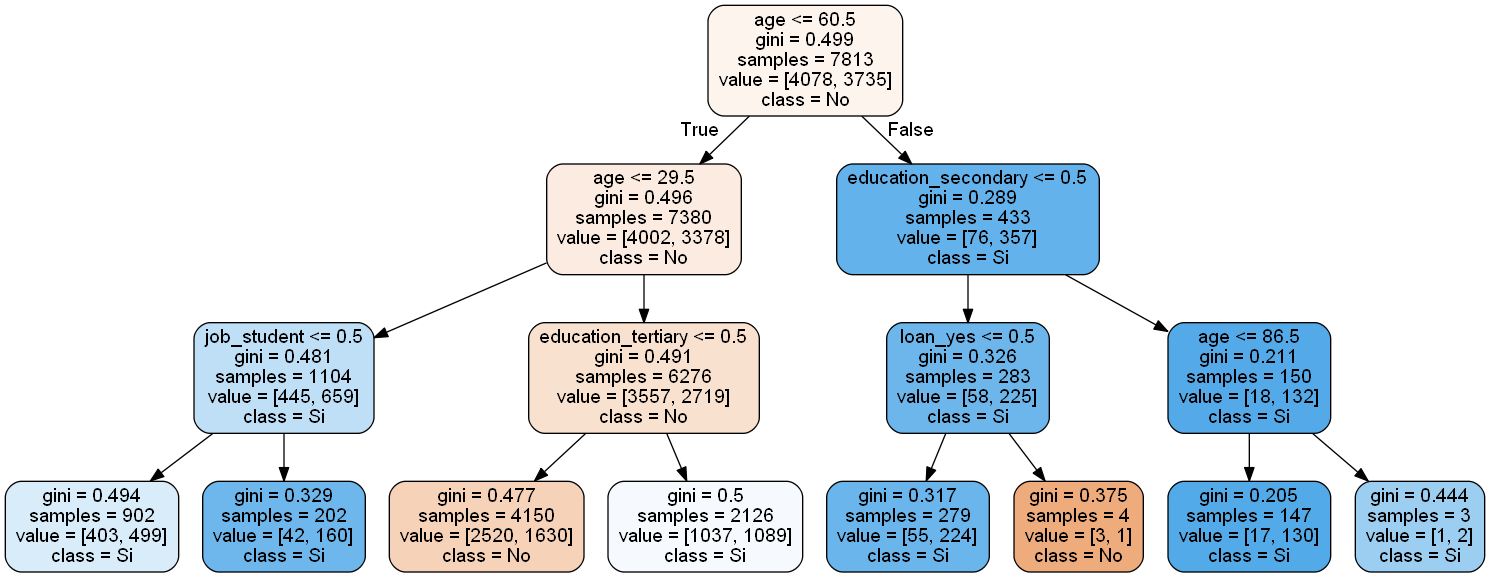

In [16]:
plot_tree(model, x_data_training_2)

Decision tree creation with max_depth = 10, min_samples_split = 300 and min_samples_leaf = 250 (model regularization)

In [17]:
model2 = tree.DecisionTreeClassifier(max_depth=10, min_samples_split=300, min_samples_leaf=250)
model2.fit(x_data_training_2, y_data_training_2)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=250,
                       min_samples_split=300)

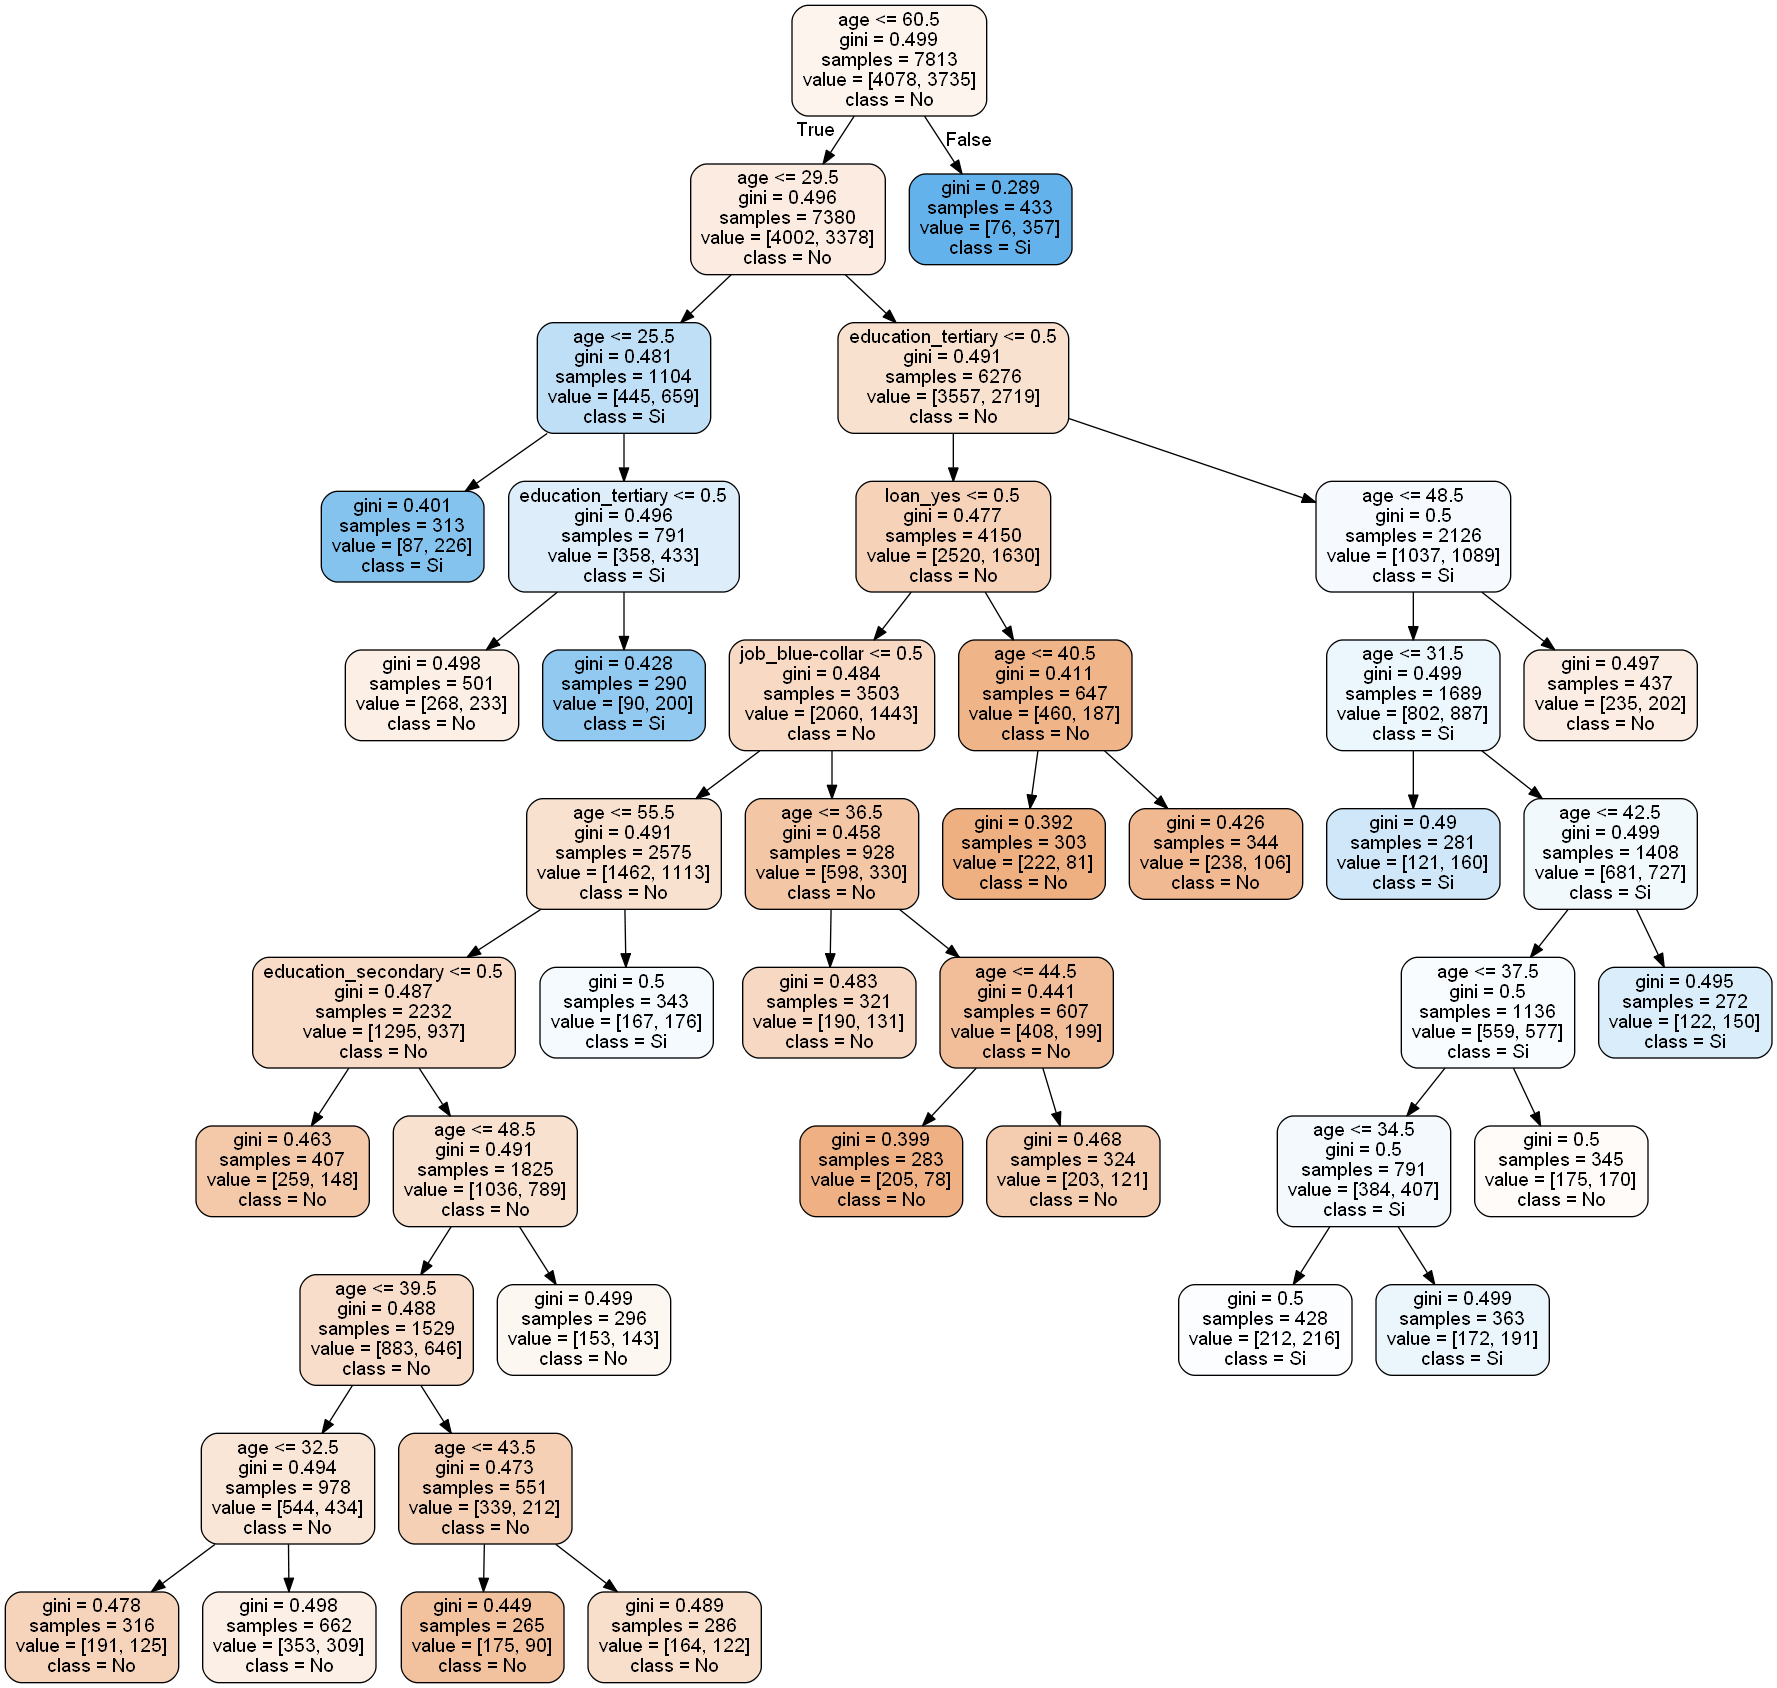

In [18]:
plot_tree(model2, x_data_training_2)

<h3>Validation</h3>

Training set

In [19]:
bank_data_x_y = pd.concat([x_data_training_2, y_data_training_2], axis=1)

IF age <= 60.5 AND age <= 29.5 THEN deposit_yes

In [20]:
d_rule = bank_data_x_y.query("age<=60.5 and age<=29.5")

Support

In [21]:
len(d_rule)

1104

Positive cases

In [22]:
sum(d_rule['yes'])

659

Hit rate

In [23]:
sum(d_rule['yes'])/len(d_rule)

0.5969202898550725

Test set

In [24]:
bank_data_x_y_test = pd.concat([x_data_test_2, y_data_test_2], axis=1)

IF age <= 60.5 & age <= 28.5 THEN deposit_yes

In [25]:
d_rule_test = bank_data_x_y_test.query("age<=60.5 and age<=29.5")

Support

In [26]:
len(d_rule_test)

448

Positive cases

In [27]:
sum(d_rule_test['yes'])

270

Hit rate

In [28]:
sum(d_rule_test['yes'])/len(d_rule_test)

0.6026785714285714

<h3>Insight</h3>

My first conclusion, using ProfileReport about the data set is that, using the phik index, the variables that has the highest correlation with 'deposit' are 'job' followed by 'education'. This makes sense because with a highest education level, people tends to have better paid jobs.

Next, creating the decision tree, i see that the most important variable to determine if a deposit is made or not, it is 'age'. In case that the age is less than 60.5 (rule where the most cases belongs), the deposit it will be made if age is more than 28.5, and education is tertiary.